In [233]:
# Dependencies

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

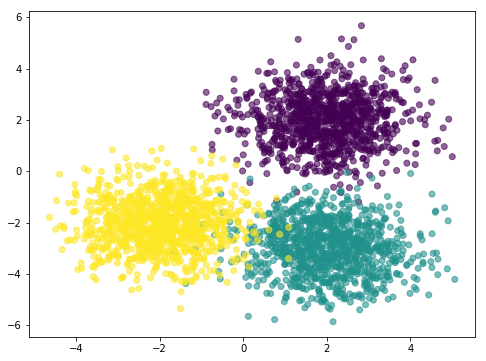

In [234]:
# Simulate Data

D = 2
K = 3
N = K*1000

X0 = np.random.randn((N//K),D) + np.array([2,2])
X1 = np.random.randn((N//K),D) + np.array([2,-3])
X2 = np.random.randn((N//K),D) + np.array([-2,-2])
X = np.vstack((X0, X1,X2))

y = np.array([0]*(N//K) + [1]*(N//K) + [2]*(N//K))

plt.figure(figsize = (8,6))
plt.scatter(X[:,0], X[:,1], c = y, alpha = 0.6)

In [235]:
X = np.hstack((np.ones((X.shape[0],1)), X))
X[:10,:]

array([[1.        , 0.1965879 , 3.09105334],
       [1.        , 1.81867229, 0.53223787],
       [1.        , 1.77945655, 2.08933129],
       [1.        , 1.63749302, 1.81028891],
       [1.        , 3.172925  , 2.28353302],
       [1.        , 0.34414279, 2.38029617],
       [1.        , 2.18450846, 1.96372545],
       [1.        , 1.35546763, 1.42978316],
       [1.        , 3.56446963, 3.08277885],
       [1.        , 2.75330495, 2.56683049]])

In [236]:
Y = pd.get_dummies(y)
Y.head()

,0,1,2
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [237]:
def sigmoid(h):
    return np.exp(h) / np.vstack((np.sum(np.exp(h), axis = 1)))

def cross_entropy(y, p):
    return  -np.sum(np.sum(y*np.log(p)))

def accuracy(y, p):
    return np.mean(y == np.round(p))

def accuracy1(y, y_hat):
    return np.sum(np.sum((y==1)&(y_hat ==1))) / y.shape[0]


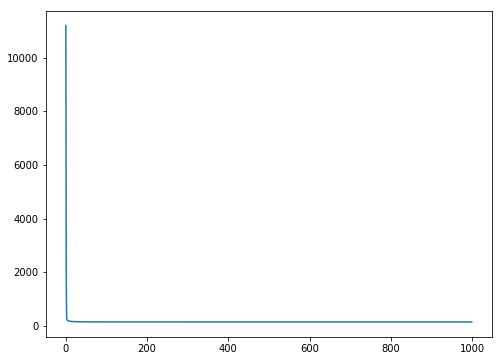

In [238]:
w = np.random.randn(D+1,K)

J = []
eta = 1e-3
epochs = int(1e3)

for t in range(epochs):
    p = sigmoid(X.dot(w))
    J.append((cross_entropy(Y, p)))
    w -= eta*X.T.dot(p - Y)
    
plt.figure(figsize = (8,6))
plt.plot(J)

In [239]:
p

array([[9.99998565e-01, 9.42313418e-09, 1.42561185e-06],
       [9.96082708e-01, 3.83098033e-03, 8.63114843e-05],
       [9.99998427e-01, 1.39003560e-06, 1.82653257e-07],
       ...,
       [1.11475651e-04, 2.93517381e-01, 7.06371144e-01],
       [1.99005269e-05, 4.39696569e-05, 9.99936130e-01],
       [3.21157906e-09, 4.71915398e-04, 9.99528081e-01]])

In [240]:
y_hat = (p == p.max(axis=1)[:,None]).astype(int)

y_hat

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

In [241]:
accuracy(Y,y_hat)

0    0.996000
1    0.982333
2    0.984333
dtype: float64

In [242]:
Y = Y.values

In [243]:
accuracy(Y,y_hat)

0.9875555555555555

In [244]:
accuracy1(Y,y_hat)

0.9813333333333333

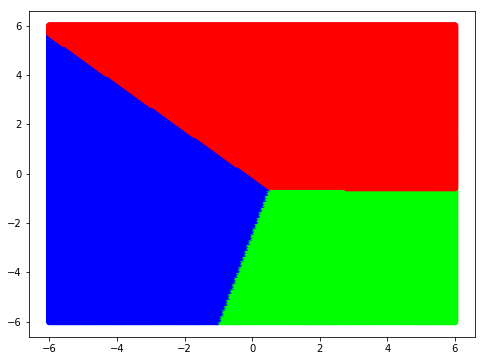

In [245]:
#X_vis = np.random.uniform(-6,6, (int(10*N),D))
X_vis = np.linspace(-6,6,200)
#X_vis = np.hstack((np.ones((int(10*N),1)), X_vis))
X_vis =np.vstack([[(1, i,j) for i in X_vis] for j in X_vis])

X_vis[:10,:]

p_vis = sigmoid(X_vis.dot(w))

y_hat = (p_vis == p_vis.max(axis=1)[:,None]).astype(int)

plt.figure(figsize = (8,6))
plt.scatter(X_vis[:,1], X_vis[:,2], c = y_hat)

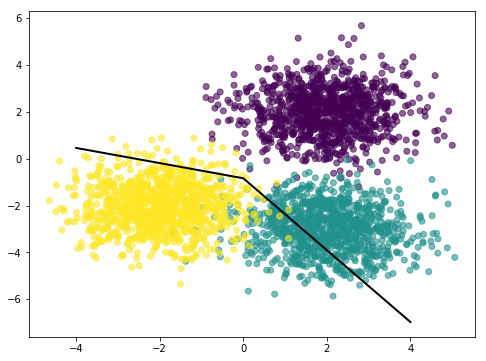

In [246]:
x1 = np.linspace(-4, 4, 3)
x2 = -(w[0]/w[2]) - (w[1]/w[2])*x1


plt.figure(figsize = (8,6))
plt.scatter(X[:,1], X[:,2], c = y, alpha = 0.6)
plt.plot(x1, x2, color = "black", linewidth = 2)


In [247]:
x1

array([-4.,  0.,  4.])

In [248]:
w

array([[ 0.1263082 , -2.60215657, -0.04158752],
       [ 0.25771054,  0.19048083, -3.60643128],
       [ 1.97759409, -3.1139426 , -2.07706035]])